In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:\Users\hp\Documents\Datasets\train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.drop('Cabin', axis = 1, inplace=True)

In [7]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

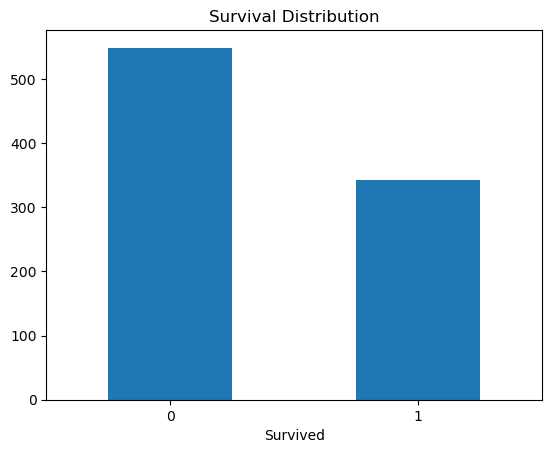

In [13]:
train['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Distribution')
plt.xticks(rotation = 0)
plt.show()

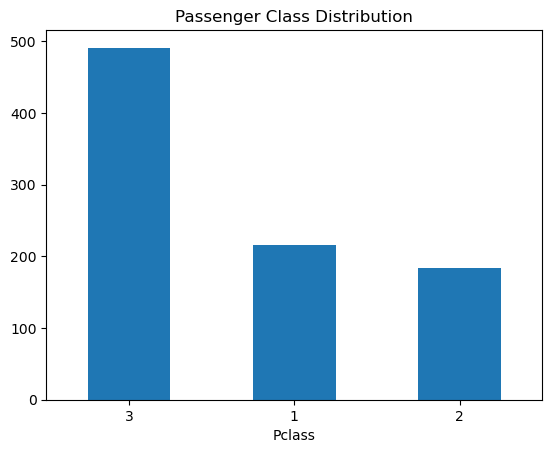

In [14]:
train['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.xticks(rotation = 0)
plt.show()

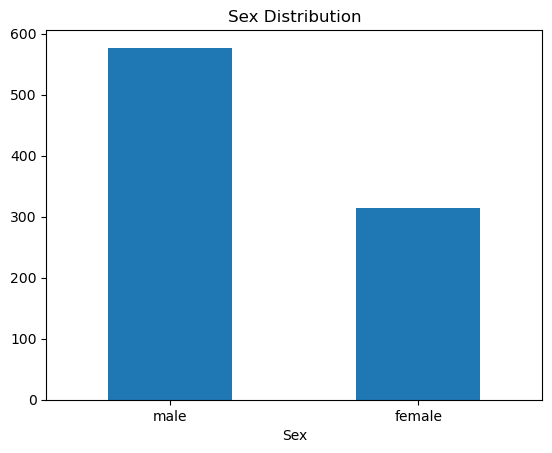

In [15]:
train['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xticks(rotation = 0)
plt.show()

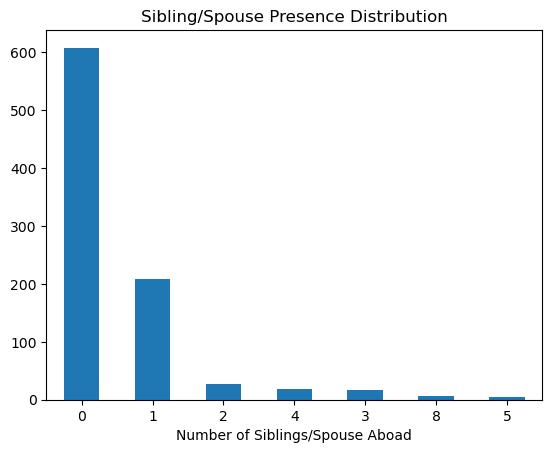

In [16]:
train['SibSp'].value_counts().plot(kind='bar')
plt.title('Sibling/Spouse Presence Distribution')
plt.xlabel('Number of Siblings/Spouse Aboad')
plt.xticks(rotation = 0)
plt.show()

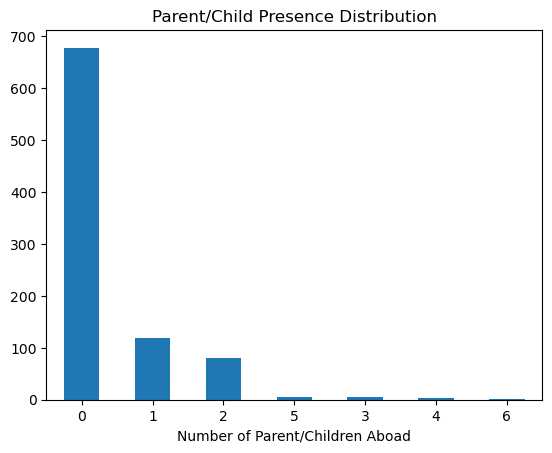

In [17]:
train['Parch'].value_counts().plot(kind='bar')
plt.title('Parent/Child Presence Distribution')
plt.xlabel('Number of Parent/Children Aboad')
plt.xticks(rotation = 0)
plt.show()

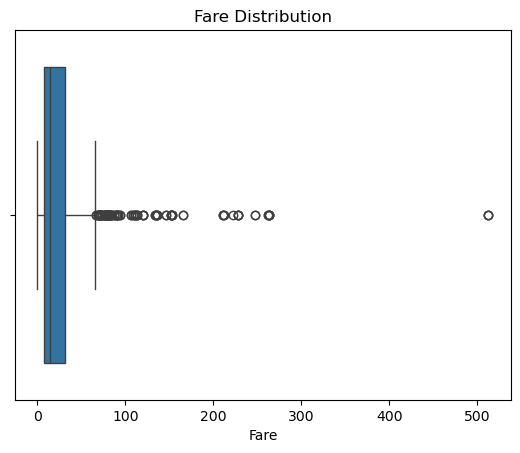

In [18]:
sns.boxplot(x=train['Fare'])
plt.title('Fare Distribution')
plt.show()

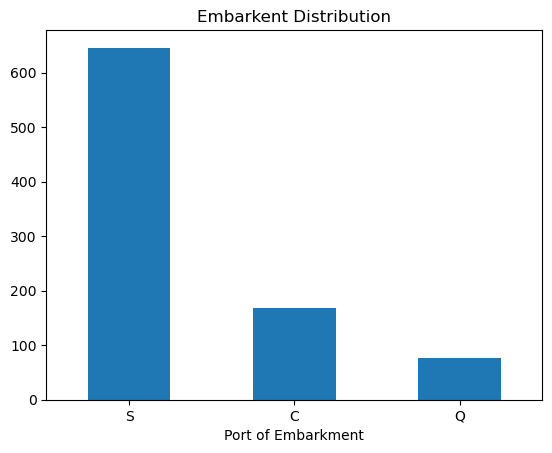

In [19]:
train['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarkent Distribution')
plt.xlabel('Port of Embarkment')
plt.xticks(rotation = 0)
plt.show()

Southampton, Cherbourg, Queenstown

In [21]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Women had a much higher survival chance than men.

In [23]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [25]:
train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [26]:
top_fares = train.nlargest(20, 'Fare')
bottom_fares = train.nsmallest(40, 'Fare')

In [27]:
top_fares.groupby('Fare')['Survived'].mean()

Fare
211.3375    1.00
211.5000    0.00
221.7792    0.00
227.5250    0.75
247.5208    0.50
262.3750    1.00
263.0000    0.50
512.3292    1.00
Name: Survived, dtype: float64

In [28]:
bottom_fares.groupby('Fare')['Survived'].mean()

Fare
0.0000    0.066667
4.0125    0.000000
5.0000    0.000000
6.2375    0.000000
6.4375    0.000000
6.4500    0.000000
6.4958    0.000000
6.7500    0.000000
6.8583    0.000000
6.9500    0.000000
6.9750    0.500000
7.0458    0.000000
7.0500    0.000000
7.0542    0.000000
7.1250    0.000000
Name: Survived, dtype: float64

In [29]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for col in cols:
    train[col] = le.fit_transform(train[col])

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [33]:
y = train['Survived']
X = train.drop('Survived', axis = 1)

In [34]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=.25, random_state=26)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

In [39]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.7979041916167665
0.7971698113207547
0.6475095785440613
0.7145877378435518


In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [41]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=.25, random_state=26)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
pred=model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

In [45]:
print(f'Accuracy is {accuracy:.2f}')
print(f'Precision score is {precision:.2f}')
print(f'Precision score is {precision:.2f}')
print(f'F1 score {f1:.2f}')

Accuracy is 0.81
Precision score is 0.81
Precision score is 0.81
F1 score 0.81


In [89]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [93]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
928,1,0,35.000000,1,0,52.715553,2
449,1,1,52.000000,0,0,30.500000,2
884,3,1,25.000000,0,0,7.050000,2
207,3,1,26.000000,0,0,18.787500,0
818,3,1,43.000000,0,0,6.450000,2
...,...,...,...,...,...,...,...
158,3,1,29.699118,0,0,8.662500,2
548,3,1,33.000000,1,1,20.525000,2
58,2,0,5.000000,1,2,27.750000,2
533,3,0,29.699118,0,2,22.358300,0
